# Analyzing Portfolio Risk and Return

This analysis compares 4 funds' risk-return profiles against the S&P 500.

Analyzed Funds:

* SOROS FUND MANAGEMENT LLC 
* PAULSON & CO.INC.
* TIGER GLOBAL MANAGEMENT LLC
* BERKSHIRE HATHAWAY INC

---

In [20]:
import pandas as pd
from pathlib import Path
import numpy as np
%matplotlib inline


### Import the Data

---

In [3]:
# Imported the data and created a dataframe
whale_navs_df = pd.read_csv(
    Path("./resources/whale_navs.csv"),
    index_col = 'date',
    parse_dates = True,
    infer_datetime_format = True
)
whale_navs_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


In [17]:
whale_navs_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
S&P 500                        0
dtype: int64

In [33]:
# Calculated the daily returns
daily_returns = whale_navs_df.pct_change().dropna()
display(daily_returns.head())
display(daily_returns.tail())


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,-0.001079,0.005050,-0.000653,-0.003985,-0.008165
2020-09-08,-0.001737,-0.001888,-0.001270,-0.005019,-0.027323
2020-09-09,0.001115,0.002123,0.002701,0.001817,0.019747
2020-09-10,-0.001258,0.001389,-0.001591,-0.002398,-0.017364
2020-09-11,-0.000418,-0.001930,-0.000434,-0.001016,0.000509


## Quantitative Analysis

---

<AxesSubplot:title={'center':'Daily Returns: 4 Funds -Vs- the S&P 500'}, xlabel='date'>

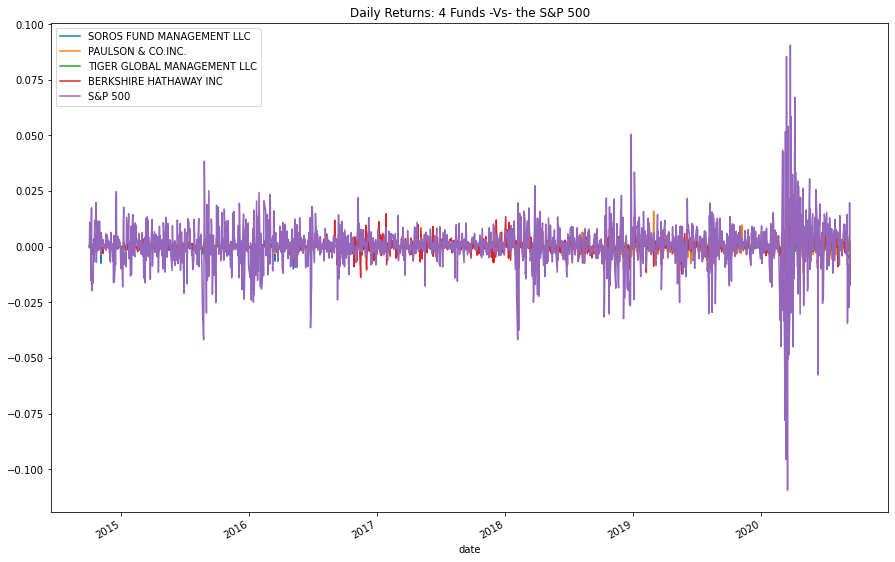

In [34]:
# Visulaized the daily returns
daily_returns.plot(figsize = (15, 10), title = "Daily Returns: 4 Funds -Vs- the S&P 500")


In [35]:
# Calculated the cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.tail()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


<AxesSubplot:title={'center':'Cumulative Returns: 4 Funds -Vs- S&P 500'}, xlabel='date'>

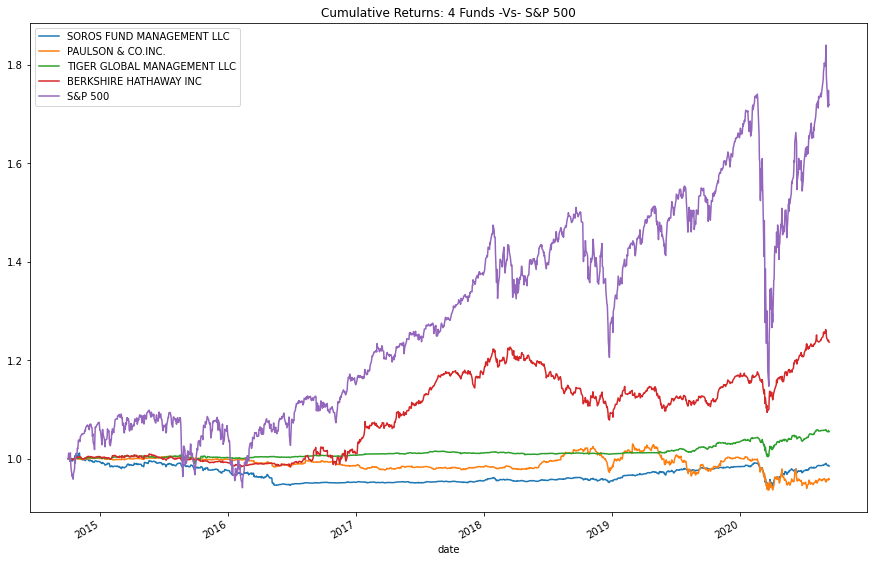

In [10]:
# Visualized the cumulative returns
cumulative_returns.plot(figsize = (15, 10), title = "Cumulative Returns: 4 Funds -Vs- S&P 500")


**Analysis:** None of the funds being analyzed outperformed the S&P 500 Index's cumulative returns.

### Analyze the Volatility

---

<AxesSubplot:title={'center':'Daily Returns: 4 Funds -Vs- the S&P 500'}>

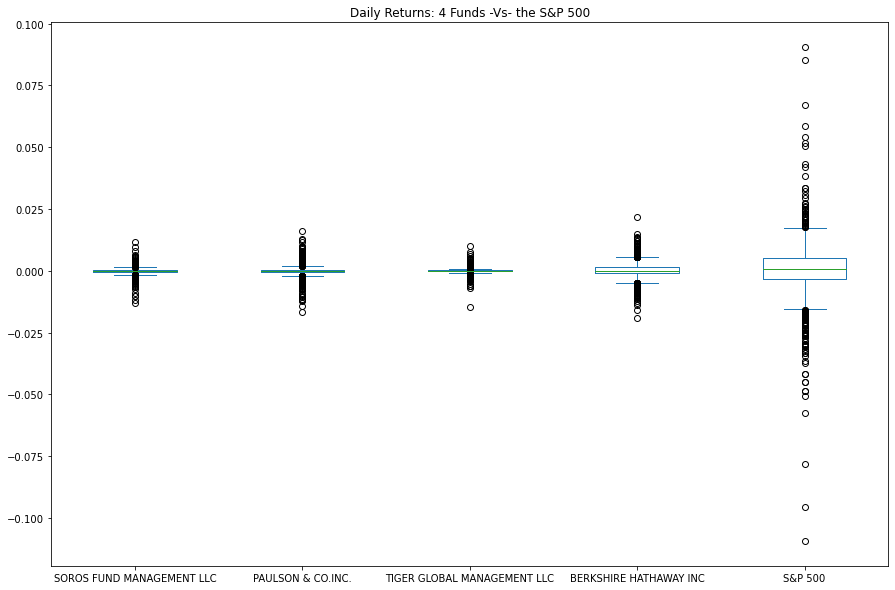

In [36]:
# Visualized the volatility of each fund compared to the volatility of the S&P 500
daily_returns.plot.box(figsize = (15, 10), title = "Daily Returns: 4 Funds -Vs- the S&P 500")


<AxesSubplot:title={'center':'Daily Returns: 4 Funds'}>

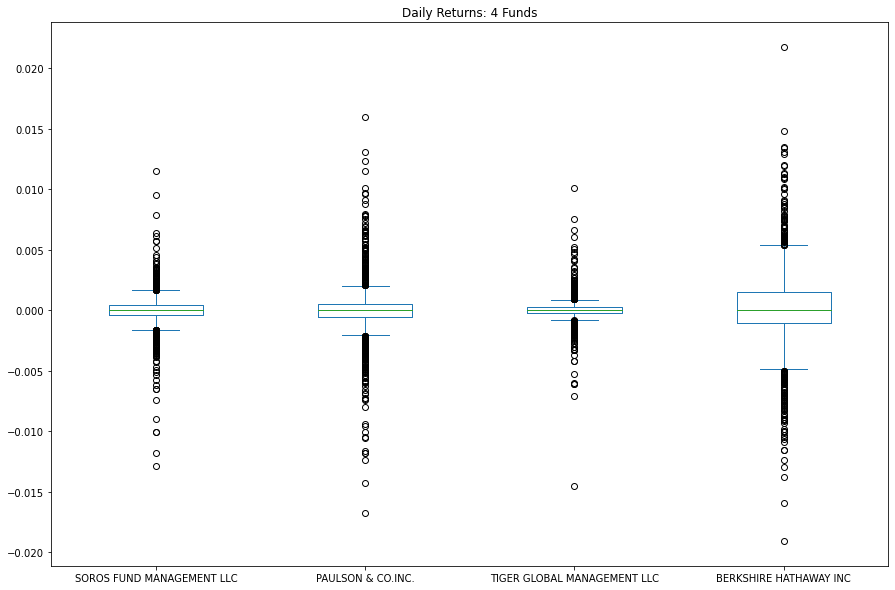

In [37]:
# Visualized only the funds to determine the most and least volatile funds
fund_only_returns = daily_returns.drop(columns = 'S&P 500')
fund_only_returns.plot.box(figsize = (15, 10), title = "Daily Returns: 4 Funds")

**Analysis:** Berkshire Hathaway INC was the most volatile fund, while Tiger Global Management LLC was the least volatile.

### Analyze the Risk

---

In [38]:
# Calculated and sorted the standard deviation for all 4 portfolios and the S&P 500
standard_deviation = daily_returns.std().sort_values()
standard_deviation.sort_values()


TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [21]:
# Calculated and sorted the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
trading_days = 252
annualized_standard_deviation = standard_deviation * np.sqrt(trading_days)
annualized_standard_deviation.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

<AxesSubplot:title={'center':'4 Funds -Vs- S&P500 Rolling 21-Day Standard Deviation'}, xlabel='date'>

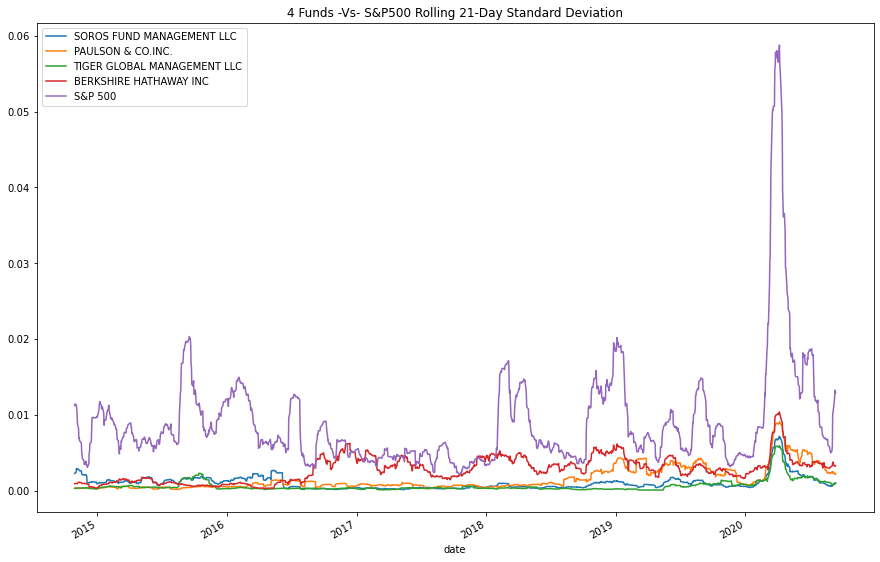

In [25]:
# Visualized the rolling standard deviations of each fund and the S&P 500
rolling_std = daily_returns_whale_navs_df.rolling(window=21).std()
rolling_std.plot(figsize = (15, 10), title = "4 Funds -Vs- S&P500 Rolling 21-Day Standard Deviation")


<AxesSubplot:title={'center':'4 Funds Rolling 21-Day Standard Deviation'}, xlabel='date'>

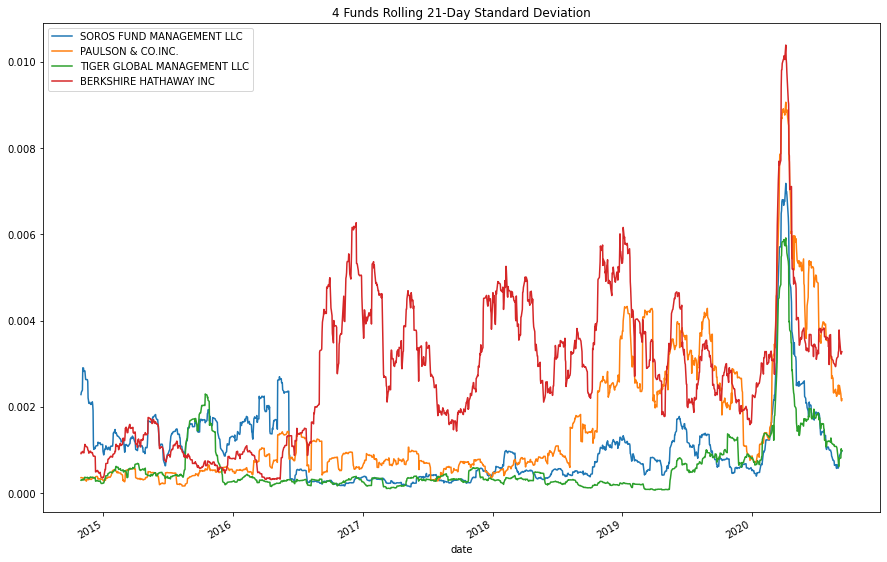

In [26]:
# Visualized the rolling standard deviation of just the 4 portfolios. 
fund_only_rolling_std = fund_only_returns.rolling(window=21).std()
fund_only_rolling_std.plot(figsize = (15, 10), title = "4 Funds Rolling 21-Day Standard Deviation")


**Analysis:** None of the funds being analyzed pose more risk than the S&P 500. It appears as if each fund's risk increases at the same time that the risk of the S&P 500 increase. Berkshire Hathaway poses the most risk, however there are periods where Tiger Global Management LLC, Paulson & CO INC, and Soros Fund Management LLC all exceed the risk levels of Berkshire Hathaway. The periods where other funds exceed the risk levels from Berkshire Hathaway do not appear to follow any identifiable trend as time progresses.


### Analyze the Risk-Return Profile

---

In [39]:
# Calculated the annual average return data for the for fund portfolios and the S&P 500
annualized_average_returns = daily_returns.mean() * trading_days
annualized_average_returns.sort_values()


PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [28]:
# Calculated the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
sharpe_ratios = annualized_average_returns / annualized_standard_deviation
sharpe_ratios.sort_values()


PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

<AxesSubplot:title={'center':'4 Funds -Vs- S&P500 Sharpe Ratios'}>

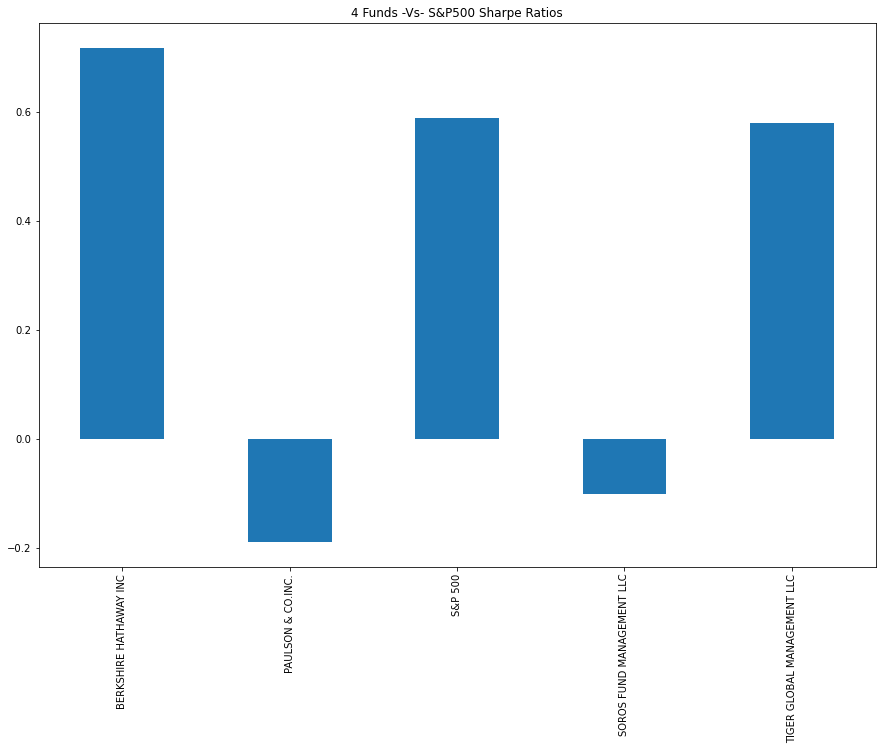

In [32]:
# Visualized the Sharpe ratios as a bar chart
sharpe_ratios.plot.bar(figsize = (15, 10), title = "4 Funds -Vs- S&P500 Sharpe Ratios")


**Analysis:** While Berkshire Hathaway INC has the highest returns, it also has the highest risk levels (annualized std at 0.052). To maintain a balanced risk -vs- return portfolio, Tiger Global Management LLC has returns that match the S&P 500, yet is much less risky (annualized std at 0.016) than Berkshire Hathaway INC. Therefore the best risk-return portfolio is Tiger Global Management LLC. Paulson & CO INC is easily the worst risk-return profile, as it returns negative amounts, and is more risky than Soros Fund Management LLC.

### Diversify the Portfolio

---

In [41]:
# Calculated the variance of the S&P 500 using a rolling 60-day window.
market_rolling_60_variance = daily_returns['S&P 500'].rolling(window=60).var()
market_rolling_60_variance.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

In [51]:
# Calculated the covariance using a 60-day rolling window 
brk_hath_60_covariance = daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(daily_returns['S&P 500'])
brk_hath_60_covariance.tail()


date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

In [49]:
# Calculated the beta based on the 60-day rolling covariance compared to the market (S&P 500)
brk_hath_beta = brk_hath_60_covariance / market_rolling_60_variance
brk_hath_beta.tail()



date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

In [46]:
# Calculated the average of the 60-day rolling beta
brk_hath_avg_60_beta = brk_hath_beta.rolling(window=60).mean()
brk_hath_avg_60_beta


date
2014-10-02         NaN
2014-10-03         NaN
2014-10-06         NaN
2014-10-07         NaN
2014-10-08         NaN
                ...   
2020-09-04    0.164022
2020-09-08    0.164963
2020-09-09    0.165795
2020-09-10    0.166471
2020-09-11    0.167102
Length: 1497, dtype: float64

<AxesSubplot:title={'center':'Berkshire Hathaway 60-Day Rolling Beta'}, xlabel='date'>

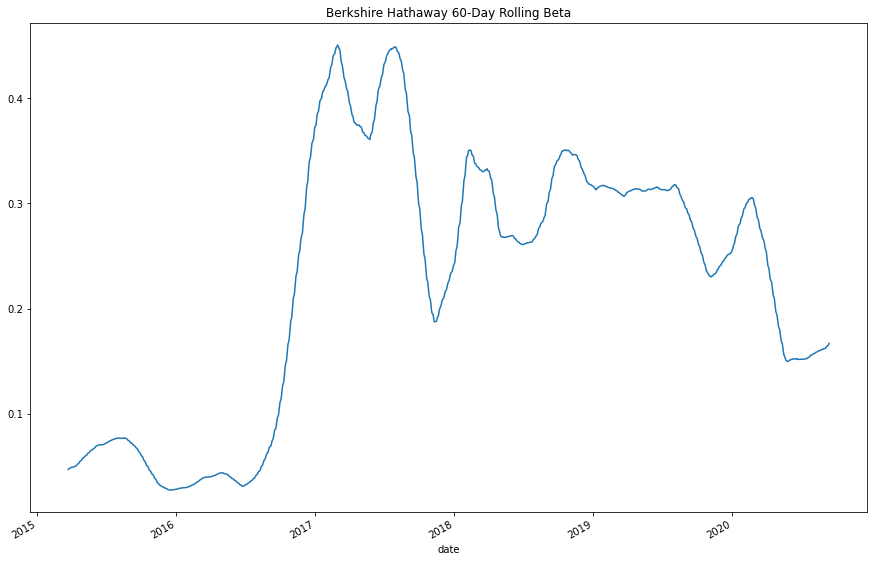

In [52]:
# Visualized the rolling beta 
brk_hath_avg_60_beta.plot(figsize = (15, 10), title = "Berkshire Hathaway 60-Day Rolling Beta")


In [53]:
# Calculated the covariance using a 60-day rolling window 
tiger_global_60_covariance = daily_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(daily_returns['S&P 500'])
tiger_global_60_covariance.tail()


date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

In [54]:
# Calculated the beta based on the 60-day rolling covariance compared to the market (S&P 500)
tiger_global_beta = tiger_global_60_covariance / market_rolling_60_variance
tiger_global_beta.tail()


date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

In [56]:
# Calculated the average of the 60-day rolling beta
tiger_global_avg_60_beta = tiger_global_beta.rolling(window=60).mean()
tiger_global_avg_60_beta.tail()

date
2020-09-04    0.070646
2020-09-08    0.070545
2020-09-09    0.070489
2020-09-10    0.070493
2020-09-11    0.070450
dtype: float64

<AxesSubplot:title={'center':'Tiger Global Management LLC 60-Day Rolling Beta'}, xlabel='date'>

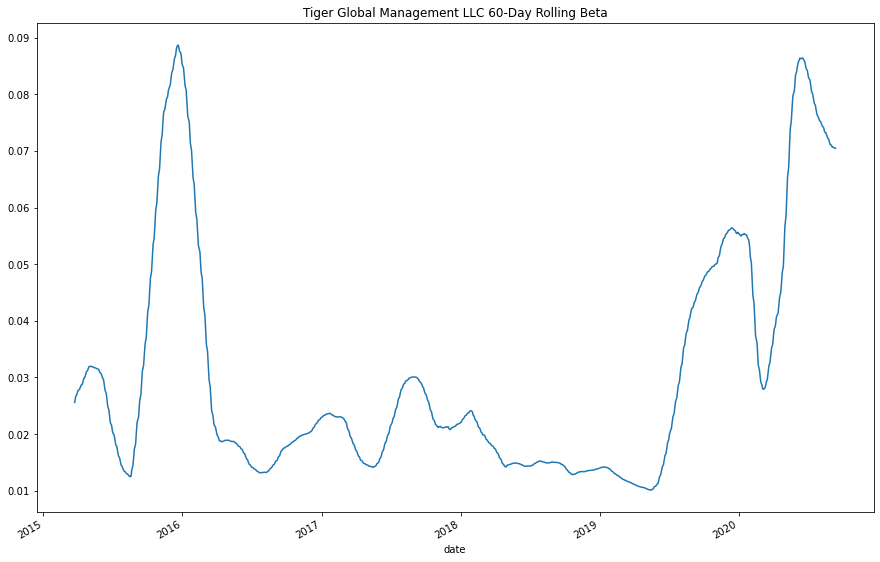

In [57]:
# Visualized the rolling beta 
tiger_global_avg_60_beta.plot(figsize = (15, 10), title = "Tiger Global Management LLC 60-Day Rolling Beta")


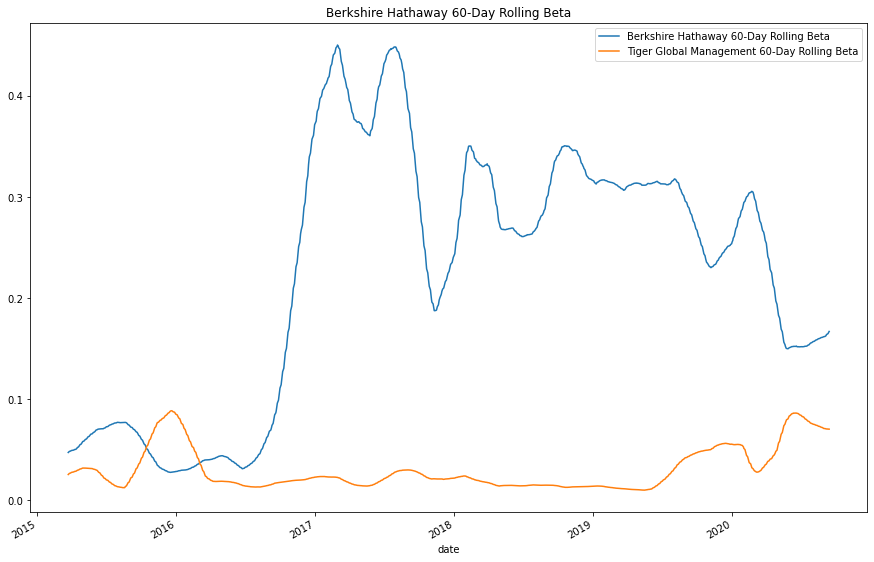

In [59]:
# Overlayed both rolling betas for better comparison
ax = brk_hath_avg_60_beta.plot(figsize = (15, 10), title = "Berkshire Hathaway 60-Day Rolling Beta")
tiger_global_avg_60_beta.plot(ax=ax)
ax.legend(["Berkshire Hathaway 60-Day Rolling Beta", "Tiger Global Management 60-Day Rolling Beta"])

**Analysis:** Berkshire Hathaway is more sensitive to movements in the S&P 500 as indicated by their rolling 60 day beta. While Berkshire Hathaway's returns are greater, their accepted risk is also higher. I recommend Tiger Global Management LLC's portfolio be added to our firm's suite of fund offerings due to its high returns and minimized risk.
